<div style ="border: blue solid 5px; font-family: Agency FB;	"><center>
<a href="#" ></a> 
    <h1> <font color="blue">Compléments de statistiques descriptives</font> </h1> 
<a href="#" ></a>     
</center>
</div>


### Dans cette section nous faisons resortir les staistiques permettant de décrire nos données

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
# Analyse multivariée
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import scipy as sp

In [34]:
##os.chdir("Mettre ici le repertoire de travail")

In [3]:
df = pd.read_csv("bdd/Base_finale/ASDES_vf.csv")

In [4]:
df['total_ges']=df["total_scope_1"]+df["total_scope_2"]

In [5]:
df[df.classe=="GE"].total_ges

0        6378.0000
1        1184.9948
2       25275.7560
3       13718.1020
4         207.1000
           ...    
1224      495.0500
1225      163.0000
1226    16892.0000
1227     4803.0000
1228     6045.8800
Name: total_ges, Length: 1026, dtype: float64

In [6]:
np.percentile(df[df.classe=="GE"].total_ges,37)

1830.33

In [7]:
np.percentile(df[df.classe=="TPE/PME"].total_ges,75)

1861.2112

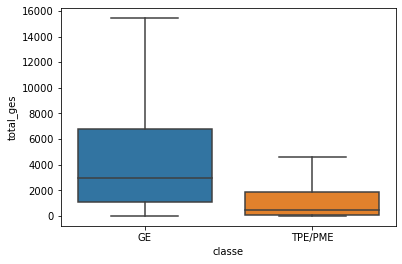

In [8]:
sns.boxplot(x = "classe", y = "total_ges", data=df,showfliers=False)
plt.savefig("bdd/0image/box Emission categorie.png")

In [9]:
df.classe.value_counts()

GE         1026
TPE/PME     203
Name: classe, dtype: int64

In [10]:
data1=df[df.classe=="GE"]
data2=df[df.classe=="TPE/PME"]

In [11]:
data1["total_ges"]=data1["total_ges"]/1026
data2["total_ges"]=data2["total_ges"]/1026

C:\Users\amado\AppData\Local\Temp/ipykernel_4988/2497145684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["total_ges"]=data1["total_ges"]/1026
C:\Users\amado\AppData\Local\Temp/ipykernel_4988/2497145684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["total_ges"]=data2["total_ges"]/1026


In [12]:
np.percentile(data1["total_ges"],37)

1.7839473684210527

In [13]:

np.percentile(data2["total_ges"],75)

1.8140460038986355

In [14]:
## Emission par filiere et categorie
scope_graphe = (df
.groupby(['secteur_secteur', 'classe',"APE_niv_1"])
.agg({"total_scope_2":'mean',"total_scope_3":'mean',"total_scope_1":'mean',"total_ges":'mean'})
.reset_index()
)

In [15]:
ok=pd.wide_to_long(scope_graphe,stubnames="total_scope",sep="_" ,i =["secteur_secteur","APE_niv_1",	"classe"],j="total_scope_",suffix=r"\w+")

In [16]:
tah=ok.index

In [17]:
cl=[]
sec=[]
scope=[]
for ele in tah:
    sec.append(ele[0])
    cl.append(ele[1])
    scope.append(ele[2])

In [18]:
ok["Secteur"]=sec
ok["classe"]=cl
ok["scope"]=scope

In [19]:
ok

total_ges  total_scope  \
secteur_secteur APE_niv_1 classe  total_scope_                             
Autre           A         GE      2             4702.150000   766.986667   
                                  3             4702.150000     0.000000   
                                  1             4702.150000  3935.163333   
                          TPE/PME 2             1147.700567   142.000000   
                                  3             1147.700567     0.000000   
...                                                     ...          ...   
transport       H         GE      3             7274.118993   317.145022   
                                  1             7274.118993  6538.132744   
                          TPE/PME 2             2960.232602   220.550857   
                                  3             2960.232602   160.373671   
                                  1             2960.232602  2739.681745   

                                                  Secteur classe    scope  
secteur_secteur APE_niv_1 classe  total_scope_                             
Autre           A         GE      2                 Autre      A       GE  
                                  3                 Autre      A       GE  
                                  1                 Autre      A       GE  
                          TPE/PME 2                 Autre      A  TPE/PME  
                                  3                 Autre      A  TPE/PME  
...                                                   ...    ...      ...  
transport       H         GE      3             transport      H       GE  
                                  1             transport      H       GE  
                          TPE/PME 2             transport      H  TPE/PME  
                                  3             transport      H  TPE/PME  
                                  1             transport      H  TPE/PME  

[108 rows x 5 columns]

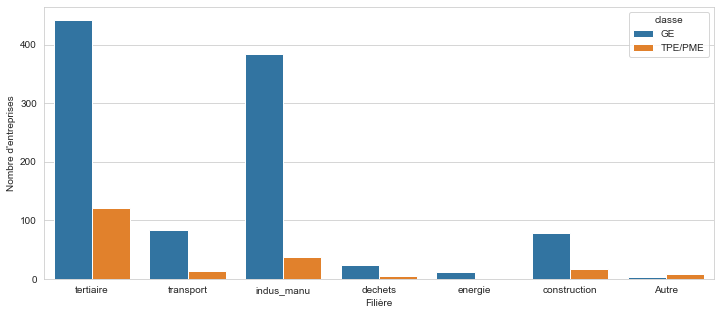

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,5))
ax =sns.countplot(x="secteur_secteur",hue="classe", data=df)
ax.set(xlabel = "Filière", ylabel = "Nombre d'entreprises")
plt.savefig("bdd/0image/repabs.png")

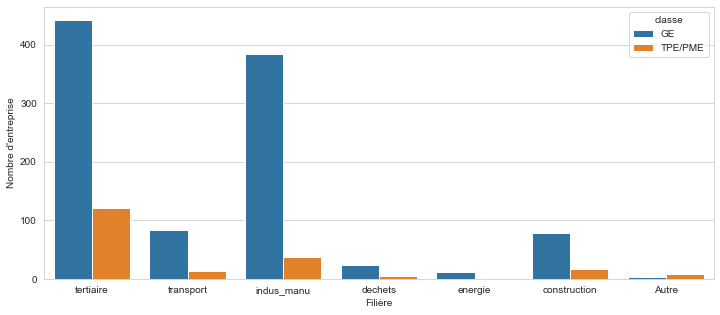

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,5))
ax =sns.countplot(x="secteur_secteur",hue="classe", data=df)
ax.set(xlabel = "Filière", ylabel = "Nombre d'entreprise")
plt.savefig("bdd/0image/rep_vf.png")

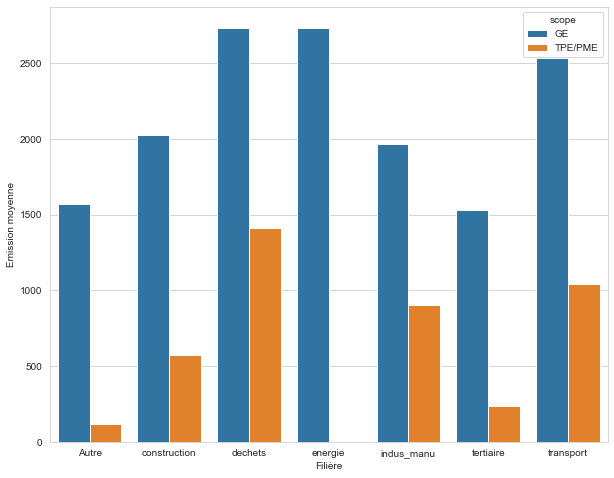

In [22]:
# Graphique
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Secteur", y="total_scope", hue='scope', 
data=ok, ci=None)
ax.set(xlabel = "Filière", ylabel = "Emission moyenne")
plt.savefig("bdd/0image/totalges_scope_secteur.png")

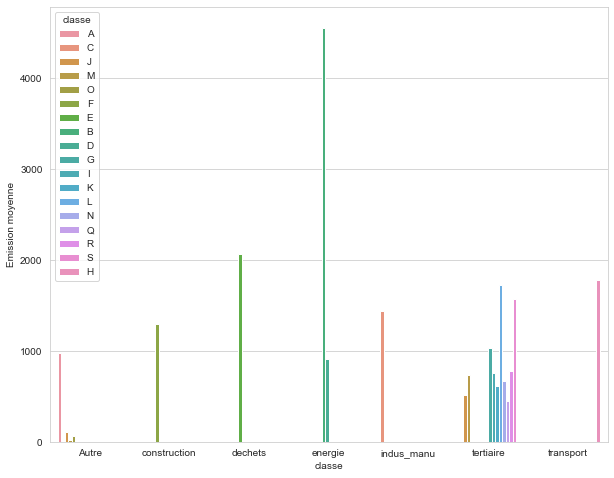

In [24]:
# Graphique
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Secteur", y="total_scope", hue='classe', 
data=ok, ci=None)
ax.set(xlabel = "classe", ylabel = "Emission moyenne")
plt.savefig("bdd/0image/totalges_categorie_secteur.png")

In [25]:
def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val


In [26]:
ok1=df[["classe","total_ges","secteur_secteur"]].groupby(["classe","secteur_secteur"]).mean()
ok=ok1.groupby("classe").sum()

(array([469., 208., 135., 107.,  68.,  52.,  39.,  26.,  22.,  17.,  19.,
         12.,   8.,   5.,   9.,   9.,   7.,   8.,   5.,   4.]),
 array([    0. ,  1448.3,  2896.6,  4344.9,  5793.2,  7241.5,  8689.8,
        10138.1, 11586.4, 13034.7, 14483. , 15931.3, 17379.6, 18827.9,
        20276.2, 21724.5, 23172.8, 24621.1, 26069.4, 27517.7, 28966. ]),
 <BarContainer object of 20 artists>)

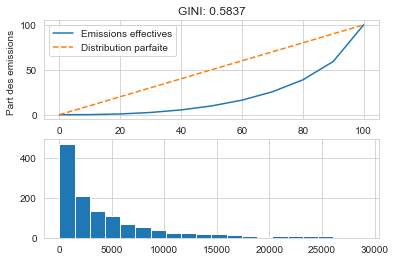

In [28]:
def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

v = df["total_ges"]
bins, result, gini_val = G(v)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(bins, result, label="Emissions effectives")
plt.plot(bins, bins, '--', label="Distribution parfaite")
plt.xlabel("fraction de la population")
plt.ylabel("Part des emissions ")
plt.title("GINI: %.4f" %(gini_val))
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(v, bins=20)

In [29]:
listCat = list(df.select_dtypes('object').columns)
listCont = list(df.drop(listCat, axis=1).columns)

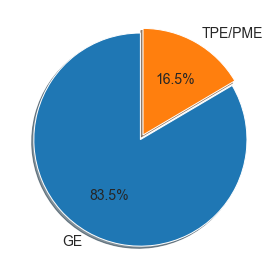

In [32]:
slices = df['classe'].value_counts()
labels=['GE', 'TPE/PME']
explode=[0, 0.05]
color=['tab:blue','tab:orange']
plt.pie(slices, labels = labels,textprops={'fontsize': '14'}, colors=color,
        explode=explode, shadow=True, startangle=90, autopct='%1.1f%%')
#plt.title("Proportion des Entreprises par categorie", fontdict={'fontsize': '16'})
plt.tight_layout()
plt.savefig("bdd/0image/C_new2.png")
plt.show()

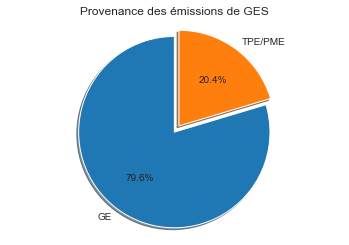

In [33]:
ge_m = df[df.classe == 'GE'].total_ges.mean()
tpe_m = df[df.classe == 'TPE/PME'].total_ges.mean()

labels = 'GE', 'TPE/PME'
sizes = [ge_m, tpe_m]
colors=['tab:blue','tab:orange']
explode = (0.02, 0.061)

plt.pie(sizes, labels=labels, explode=explode, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title("Provenance des émissions de GES")
#plt.savefig('0image/Repartition Ges Par Categorie.png')
plt.show()

[Text(0.5, 0, 'Filière'), Text(0, 0.5, 'Emission moyenne')]

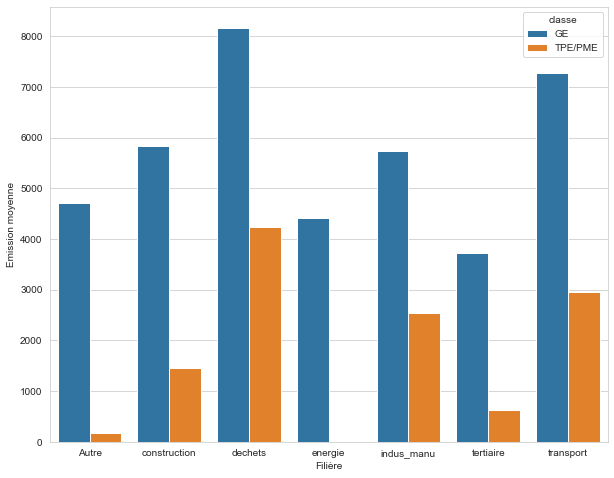

In [ ]:
## Emission par filiere et categorie
scope_graphe = (df
.groupby(['secteur_secteur', 'classe'])
.agg({'total_ges': 'mean'})
.reset_index()
)

scope_graphe

# Graphique
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="secteur_secteur", y="total_ges", hue='classe', 
data=scope_graphe, ci=None)
ax.set(xlabel = "Filière", ylabel = "Emission moyenne")
#plt.savefig("0image/Emission_filiere_GE_TPE_PME.png")

<AxesSubplot:xlabel='classe', ylabel='total_ges'>

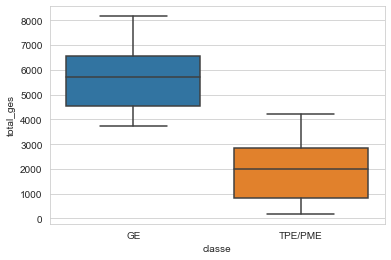

In [ ]:
## Boxplot
sns.boxplot(x = "classe", y = "total_ges", data=scope_graphe)
#plt.savefig("0image/box Emission categorie.png")

In [ ]:
np.percentile(scope_graphe.loc[scope_graphe.classe=="TPE/PME","total_ges"], 90)
scope_graphe[scope_graphe.classe=="GE"].describe()
np.percentile(scope_graphe.loc[scope_graphe.classe=="GE","total_ges"], 1)
np.percentile(scope_graphe, 50)

3594.8915577485714

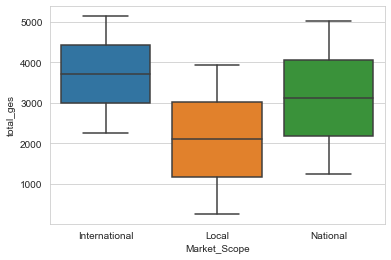

In [ ]:
grbyMarketNet = (df
.groupby(['Market_Scope', 'classe'])
.agg({'total_ges': 'mean'})
.reset_index()
)
## Boxplot
sns.boxplot(x = "Market_Scope", y = "total_ges", data=grbyMarketNet)
plt.savefig("bdd/0image/box total_ges Market")

[Text(0.5, 0, 'Filière'), Text(0, 0.5, "Chiffre d'affaire moyen")]

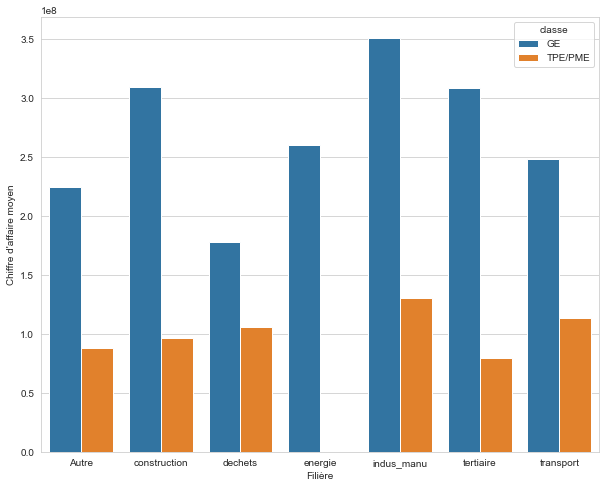

In [ ]:
turnover = (df
.groupby(['secteur_secteur', 'classe'])
.agg({'NetTurnover': 'mean'})
.reset_index()
)
turnover
## Graphique
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

ax = sns.barplot(x="secteur_secteur", y="NetTurnover", hue='classe', data=turnover, ci=None)
ax.set(xlabel = "Filière", ylabel = "Chiffre d'affaire moyen")
##plt.savefig("bdd/0image/Chiffre_affaire_filiere_categ.png")

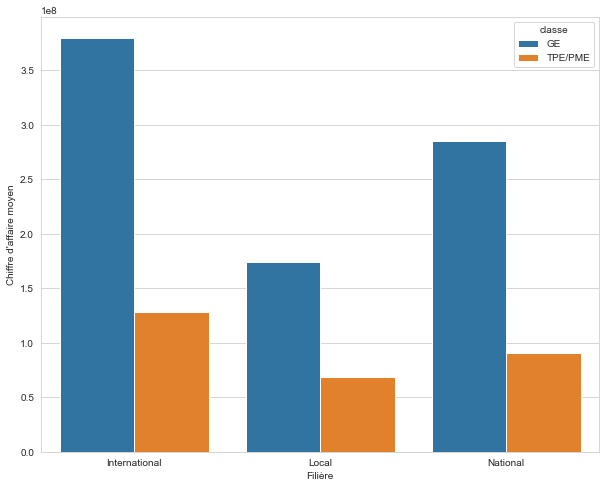

In [ ]:
turnover = (df
.groupby(['Market_Scope', 'classe'])
.agg({'NetTurnover': 'mean'})
.reset_index()
)
turnover
## Graphique
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

ax = sns.barplot(x="Market_Scope", y="NetTurnover", hue='classe', data=turnover, ci=None)
ax.set(xlabel = "Filière", ylabel = "Chiffre d'affaire moyen")
plt.savefig("bdd/0image/Chiffre_affaire_Market_categ.png")

[Text(0.5, 0, 'Filière'), Text(0, 0.5, 'Bilan moyen')]

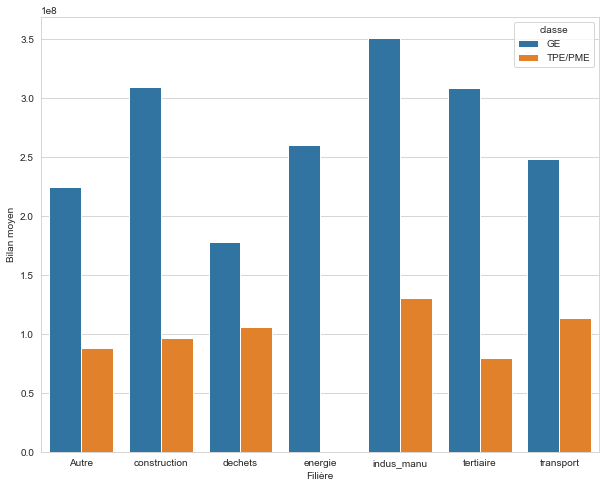

In [ ]:
## Bilan par filiere et categorie
bilan = (df
.groupby(['secteur_secteur', 'classe'])
.agg({'NetTurnover': 'mean'})
.reset_index()
)
bilan
## Graphique
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

ax = sns.barplot(x="secteur_secteur", y="NetTurnover", hue='classe', data=bilan, ci=None)
ax.set(xlabel = "Filière", ylabel = "Bilan moyen")
##plt.savefig("bdd/0image/Bilan_filiere_categorie.png")

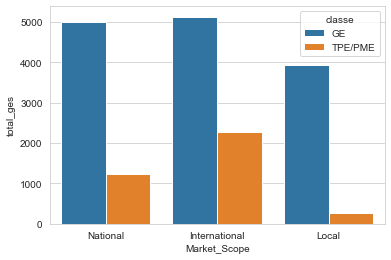

In [ ]:
ax = sns.barplot(x="Market_Scope", y= "total_ges",hue='classe', data=df, ci=None)

Text(0.5, 1.0, "Moyenne du chiffre d'affaire par categorie d'entreprise")

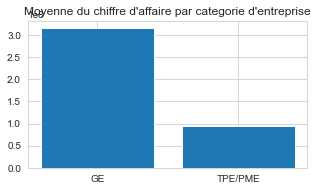

In [ ]:
## Diagramme en barres: Moyenne des émissions par catégorie d'entreprise
ge_m = df[df.classe == 'GE'].NetTurnover.mean()
tpe_m = df[df.classe == 'TPE/PME'].NetTurnover.mean()
fig, ax = plt.subplots(figsize=(5, 2.7))
categories = ['GE', 'TPE/PME']
valeurs = [ge_m, tpe_m]
ax.bar(categories, valeurs);
plt.title("Moyenne du chiffre d'affaire par categorie d'entreprise")

Text(0.5, 1.0, "Moyenne du nombre de salaries par categorie d'entreprise")

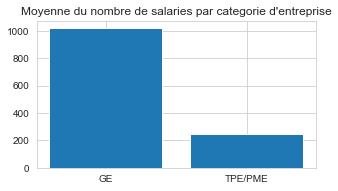

In [ ]:
## Diagramme en barres: Moyenne des émissions par catégorie d'entreprise
ge_m = df[df.classe == 'GE'].Average_number_of_employees.mean()
tpe_m = df[df.classe == 'TPE/PME'].Average_number_of_employees.mean()
fig, ax = plt.subplots(figsize=(5, 2.7))
categories = ['GE', 'TPE/PME']
valeurs = [ge_m, tpe_m]
ax.bar(categories, valeurs);
plt.title("Moyenne du nombre de salaries par categorie d'entreprise")

In [ ]:
list_interet=["classe","NetTurnover","total_ges","secteur_secteur"]

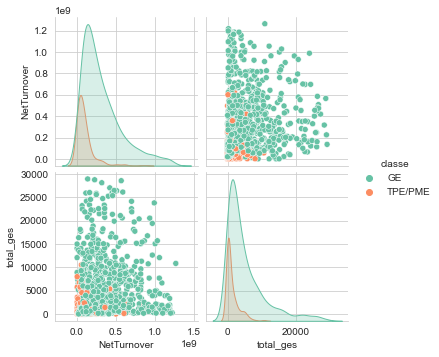

In [ ]:
sns.pairplot(df[list_interet], hue = "classe", palette="Set2")

<AxesSubplot:>

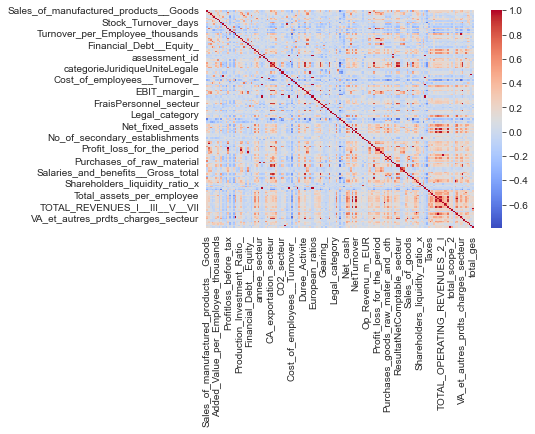

In [56]:
sns.heatmap(df[listCont].corr(), cmap = 'coolwarm')

In [55]:
## Matrice de corrélation
corr = df[["NetTurnover","total_ges"]].corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))
corr


,NetTurnover,total_ges
NetTurnover,1.0,0.19
total_ges,0.19,1.0


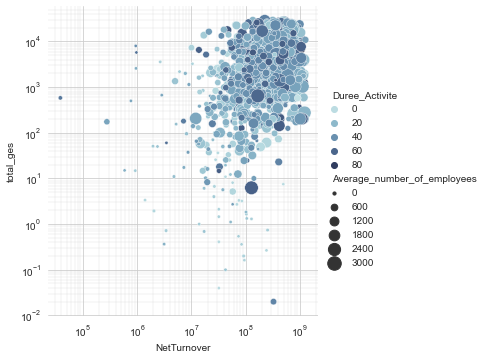

In [88]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="NetTurnover", y='total_ges',
    hue="Duree_Activite", size="Average_number_of_employees",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [90]:
df[listCat]=df[listCat].astype("category")

In [91]:
df_2=df[list_interet].groupby("secteur_secteur").mean()

In [92]:
df.classe.value_counts()

GE         1026
TPE/PME     203
Name: classe, dtype: int64

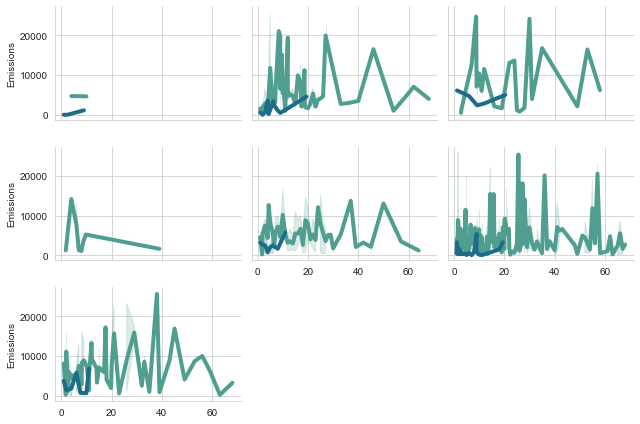

In [97]:
g = sns.relplot(
    data=df,
    x='siret_count', y="total_ges", col="secteur_secteur", hue="classe",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)
ax.set_xticks(ax.get_xticks()[::2])
g.set_titles("")
g.set_axis_labels("", "Emissions")
g.tight_layout()



<AxesSubplot:xlabel='annee_secteur', ylabel='total_ges'>

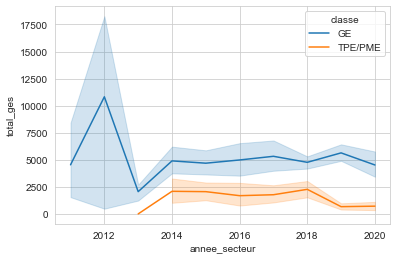

In [98]:
sns.lineplot(x="annee_secteur", y="total_ges",
             hue="classe",
             data=df)

<AxesSubplot:xlabel='secteur_secteur', ylabel='total_ges'>

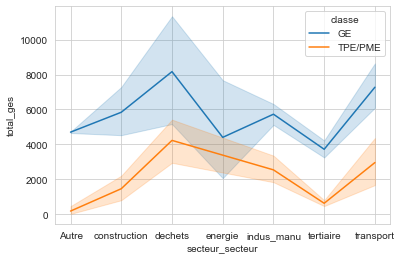

In [100]:
sns.lineplot(x="secteur_secteur", y="total_ges",
             hue="classe",
             data=df)